In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from retinaface import RetinaFace
import os

In [ ]:
path = "faces/"
images = os.listdir(path)

In [ ]:
print(len(images))

In [ ]:
faceDetectionContainer = []
for i in range(0,len(images)):
    tempImg = cv2.imread(f"{path}{images[i]}")
    tempImg = cv2.cvtColor(tempImg, cv2.COLOR_BGR2RGB)
    faceDetectionContainer.append(RetinaFace.detect_faces(tempImg))

In [ ]:
print(faceDetectionContainer)

In [82]:
import convolution_func_from_scratch as conv

In [83]:
identity_kernel = np.array([[0,0,0],[0,1,0], [0,0,0]])

In [84]:
test_image = cv2.imread(f"{path}{images[3]}")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [85]:
new_img = conv.applyConvOnImage(test_image, identity_kernel)

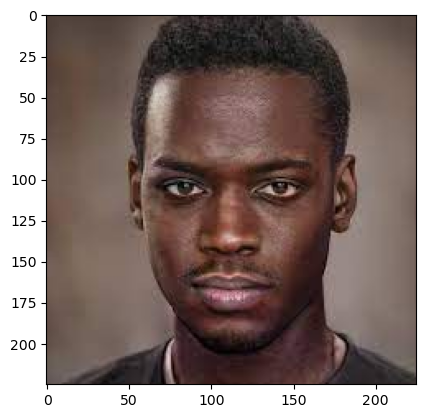

In [86]:
plt.imshow(test_image)

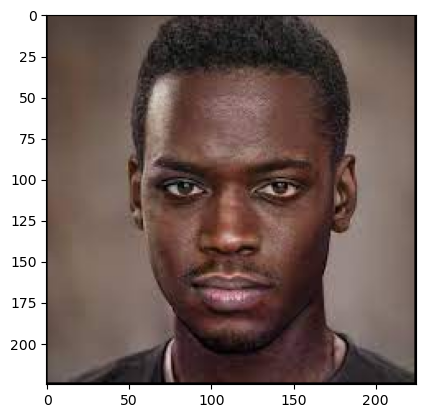

In [87]:
plt.imshow(new_img)